In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df = pd.read_csv('USA_Housing.csv')
print(df.columns)

X, Y = df.loc[ :, ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms', 'Area Population']], df.loc[:, 'Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

print(X_train)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
[[ 1.01488511  0.21970779 -1.60801718 -0.53043442 -0.46589065]
 [-0.57519648 -0.41307219 -0.15515681 -0.67738337  0.61248747]
 [ 0.64461683  0.80527776 -0.8443802  -1.28967069 -0.87061603]
 ...
 [-0.30612667 -0.37224505  0.84761953  1.20029774 -0.14627846]
 [-1.10396952  0.98496708  0.50826838 -0.48145143  0.7138953 ]
 [ 0.42022548 -1.09901093  0.6041929   0.85741684 -0.10909347]]


In [3]:
sgdr = SGDRegressor()
sgdr.fit(X_train, Y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

print((sgdr.coef_, sgdr.intercept_))

SGDRegressor()
number of iterations completed: 12, number of weight updates: 42001.0
(array([229571.60783959, 164868.65580348, 122375.81536043,    961.44637578,
       150026.04875173]), array([1230726.63023999]))


In [4]:
Y_predicted = sgdr.predict(X_test)

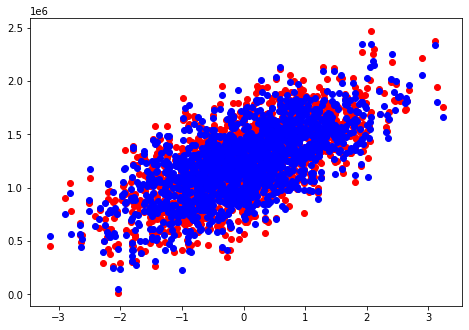

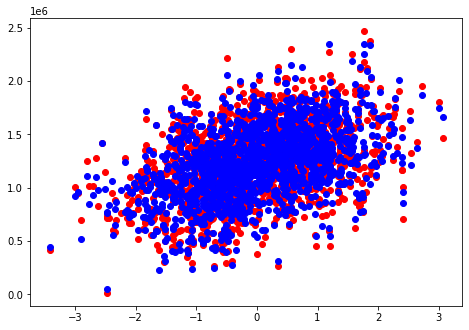

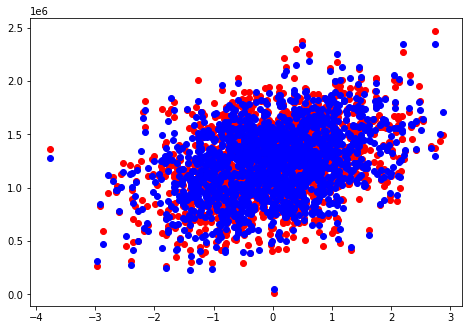

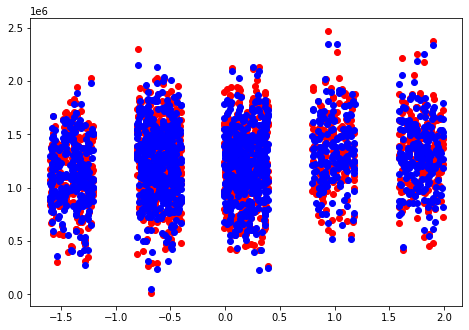

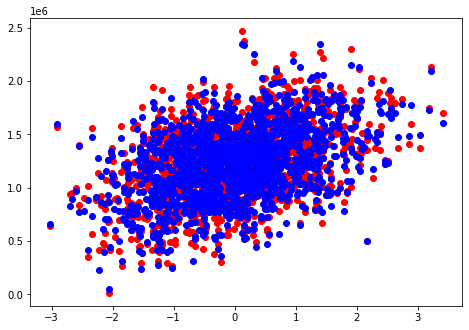

In [5]:
n = 5

for i in range(n):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(X_test[:, i], Y_test, color='r')
    ax.scatter(X_test[:, i], Y_predicted, color='b')
    plt.show()